# Задача

20. Условная оптимизация. Метод штрафных функций
Рассмотрим один из многочисленных вариантов метода штрафных функций. Задача условной оптимизации
f(x)→min 
при ограничениях
g1(x)=0,…,gm(x)=0,h1(x)≤0,…,hp(x)≤0 
решается при помощи решения последовательности вспомогательных задач безусловной оптимизации:
(F(x)+c∑i=1mg(hi)2+c∑k=1p[h(hk)]2+)→min, 
где  c  – некоторая возрастающая последовательность (например, геометрическая прогрессия),  [α]+=max{0,α} .

Реализуйте данный метод. Для решения задачи безусловной оптимизации воспользуйтесь функциями из библиотеки SciPy.

Проиллюстрируйте работу метода на двумерной и многомерных функциях Розенброка
f(x1,x2,…,xn)=∑i=1n−1((1−xi)2+100(xi+1−x2i)2) 
с линейными и квадратичными ограничениями. Для  n=2  изобразите найденные точки минимума на каждой итерации.



# Первый способ решения

In [185]:
from scipy.optimize import minimize, rosen
import matplotlib.pyplot as plt
import  numpy as np
from matplotlib import cm, pylab

самостоятельно определим функцию

In [186]:
rz = lambda x: (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

Для решения задач условной оптимизации в пакете scipy.optimize предоставляется функцией minimize(). Даная функция уже имеет некоторые методы условной оптимизации, однако известно, что универсального способа для решения всех задач не существует. Для реализации метода штрафных функций необходимо определить следующее условия:

> x1−2x2+2=0 

> −x1−2x2+6=0(2)

> −x1−2x2+2=0

Определим ограничения:

In [187]:
h_1 = lambda x: (x[0] - 2 * x[1] + 2)
h_2 = lambda x: (-x[0] - 2 * x[1] + 6)
h_3 = lambda x: (-x[0] + 2 * x[1] + 2)

Основная идея метода штрафных функций состоит в преобразовании задачи минимизации функции с ограничениями. Ограничение ввели ранние. Для реализации необходима следующая функця:

In [188]:
curr_func = lambda x: rz(x) + r * (1.0 / (h_1(x) ** 2 + h_2(x) ** 2 + h_3(x) ** 2))

Она включает в себя функцию Розенброка и ограничения.
Метод реализуем с помощью цикла с количеством итераций 1000. Для выхода с  цикла необходимо задать точность eps. Когда алгоритм достигнет необходимой точности, программа выйдет из цикла и выведет результат. 
Для расчета глобального минимума также обратимся к функции Scipy.optimize.minimize. 

In [189]:
x_c = [1.1,1.1]
i = 1
r = 1
b = 0.5
eps = 0.0001
while i < 1000:

    x_c =minimize(curr_func, x_c).x
    i += 1
    r *= b
    if curr_func(x_c) < eps:
        break


Минимум графика 1  = [0.9999468223837773, 0.9998935310808353] 
Итераций работы программы -  11 


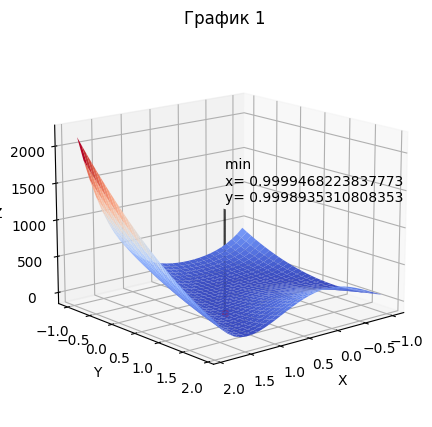

In [190]:
fig = plt.figure(figsize=[6, 5])
X = np.arange(-1, 2, 0.1)
Y = np.arange(-1, 2, 0.1)
X, Y = np.meshgrid(X, Y)

Z_f_1 = curr_func(np.array([X,Y]))
fun_plot_1 = fig.add_subplot(111, projection='3d')
fun_plot_1.scatter(list(x_c)[0],list(x_c)[1],20,color='red',marker='o')
fun_plot_1.text(list(x_c)[0],list(x_c)[1],1500,"min \nx= {}\ny= {}".format(list(x_c)[0],list(x_c)[1]), size=10, zorder=1, color='k')
fun_plot_1.quiver(1,1,np.linspace(1400,0,500),1,1,0,length=0.005, normalize=False,color='black')
surf_1 = fun_plot_1.plot_surface(X, Y, Z_f_1, cmap=cm.coolwarm)
fun_plot_1.set_xlabel('X')
fun_plot_1.set_ylabel('Y')
fun_plot_1.set_zlabel('Z')
fun_plot_1.view_init(15, 50)
plt.title('График 1')
print('Минимум графика 1  = {} '.format(list(x_c)))
print("Итераций работы программы -  {} ".format(i))

Метод Розенброка реализовано с помощью введённой ранее функции . Для поиска глобального минимума воспользуемся функцией minimize()с аргументами: rz – функция 1; x_0 – массив вещественных элементов размера.

Минимум графика 2  = [1.0002939171857184, 1.000564316240301] 


Text(0.5, 0.92, 'График 2')

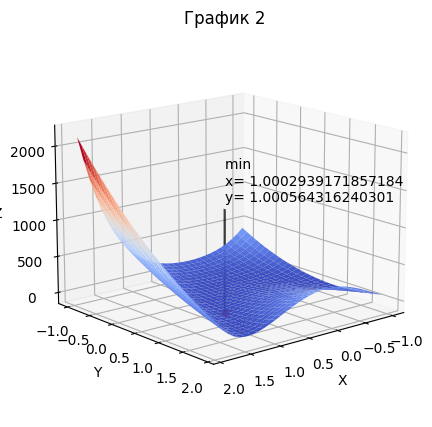

In [191]:
x0 = [1.1,1.1]
cons = ({'type': 'ineq', 'fun': h_1},
        {'type': 'ineq', 'fun': h_2},
        {'type': 'ineq', 'fun': h_3})
x_1 = minimize(rz, x0, constraints=cons).x
print('Минимум графика 2  = {} '.format(list(x_1)))
fig = plt.figure(figsize=[6, 5])
# Создаем данные для графика
X = np.arange(-1, 2, 0.1)
Y = np.arange(-1, 2, 0.1)
X, Y = np.meshgrid(X, Y)

Z_f_1 = rz(np.array([X,Y]))
fun_plot_1 = fig.add_subplot(111, projection='3d')
fun_plot_1.scatter(list(x_1)[0],list(x_1)[1],20,color='red',marker='o')
fun_plot_1.text(list(x_1)[0],list(x_1)[1],1500,"min \nx= {}\ny= {}".format(list(x_1)[0],list(x_1)[1]), size=10, zorder=1, color='k')
fun_plot_1.quiver(1,1,np.linspace(1400,0,500),1,1,0,length=0.005, normalize=False,color='black')
surf_1 = fun_plot_1.plot_surface(X, Y, Z_f_1, cmap=cm.coolwarm)
fun_plot_1.set_xlabel('X')
fun_plot_1.set_ylabel('Y')
fun_plot_1.set_zlabel('Z')
fun_plot_1.view_init(15, 50)
plt.title('График 2')

# Второй способ решения

In [173]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as mpl
from scipy.optimize import minimize

Так же как и в первом случае мы задаём константы, ограничения(немного их изменив под новый вид графика) и функцию Розенброка от 2 переменных

In [174]:
x_d = [1, 1]
i = 1 
eps = 0.0001 
r = 1 
b = 0.5 

In [175]:
v_1 = lambda x: (-x[0] + 5) 
v_2 = lambda x: (-x[1] + 5) 

In [176]:
roz = lambda x: ((1-x[0])**2) + 100*(x[1] - x[0]**2)**2 
func = lambda x: roz(x) + r*(v_1(x)**2 + v_2(x)**2)

Найденный минимум - [1.0000413  1.00008274]
Итераций работы программы - 20


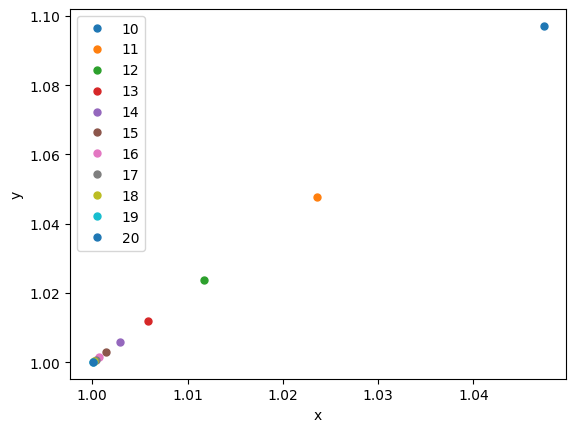

In [177]:
while i < 1000:
    if(i >= 10):
        mpl.plot(x_d[0], x_d[1], 'o', markersize=5, label=i)
    if r*(max(0, v_1(x_d))**2 + max(0, v_2(x_d))**2) < eps:
        break
    func = lambda x: roz(x) + r*(v_1(x)**2 + v_2(x)**2)
    x_d = minimize(func, x_d).x;
    i += 1
    r  *= b;   

print("Найденный минимум - " + str(x_d))
print("Итераций работы программы - " + str(i))

mpl.xlabel('x')
mpl.ylabel('y')
mpl.legend()

pass

**Найдем минимум двумерной функции Розенброка**

In [178]:
x_d = [5, 10]
i = 1
eps = 0.00001
r = 0.2
b = 1

v_1 = lambda x: (x[1]**2 + x[0]**2 - 20) #Ограничение 1
v_2 = lambda x: (x[0] + x[1] - 6) #Ограничение 2
v_3 = lambda x: (x[1]**2 - 5) #Ограничение 3

roz = lambda x: ((1-x[0])**2) + (100*(x[1] - x[0]**2)**2)
func = lambda x: roz(x) + r*(v_1(x)**2 + v_2(x)**2 + v_3(x)**2)

Найденный минимум - [1.99570942 3.98506837]
Итераций работы программы - 2


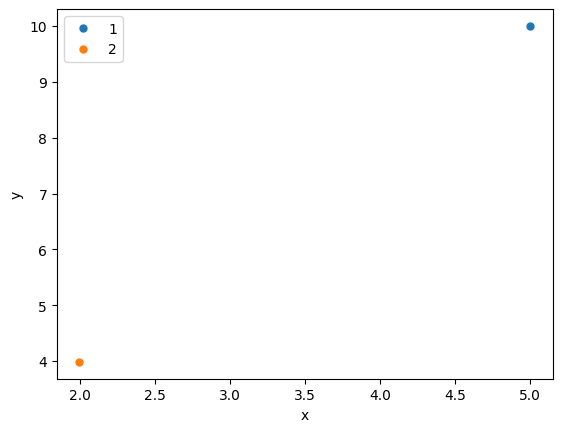

In [179]:
while i < 1000:
    if(i >= 1):
        mpl.plot(x_d[0], x_d[1], 'o', markersize=5, label=i)
    if r*(max(0, v_1(x_d))**2 + max(0, v_2(x_d))**2) < eps:
        break
    func = lambda x: roz(x) + r*(v_1(x)**2 + v_2(x)**2)
    x_d = minimize(func, x_d).x;
    i += 1
    r  *= b;   

print("Найденный минимум - " + str(x_d))
print("Итераций работы программы - " + str(i))

mpl.xlabel('x')
mpl.ylabel('y')
mpl.legend()

pass

**Найдем минимум трехмерной функции Розенброка**

In [180]:
x_d = [5, 10, 15]
i = 1
eps = 0.01
r = 0.001
b = 200


v_1 = lambda x: (x[0]**2 + 10)
v_2 = lambda x: (x[0]**2 + x[1]**2 - 200)
v_3 = lambda x: (x[2]**2 - 33)


roz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2 + (1-x[1])**2 + 100*(x[2] - x[1]**2)**2
func = lambda x: roz(x) + r*(v_1(x)**2 + v_2(x)**2 + v_3(x)**2)

Найденный минимум - [  3.69461729  13.65100181 186.35161618]
Итераций работы программы - 10


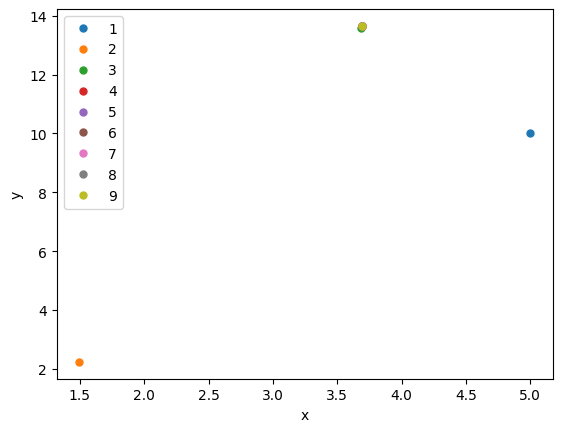

In [181]:
while i < 10:
    if(i >= 0):
        mpl.plot(x_d[0], x_d[1], 'o', markersize=5, label=i)
    if r*(max(0, v_1(x_d))**2 + max(0, v_2(x_d))**2 + max(0, v_3(x_d))**2) < eps:
        break
    func = lambda x: roz(x) + r*(min(0, v_1(x))**2 + min(0, v_2(x))**2 + min(0, v_3(x))**2)
    x_d = minimize(func, x_d).x;
    i += 1
    r  *= b;   

print("Найденный минимум - " + str(x_d))
print("Итераций работы программы - " + str(i))

mpl.xlabel('x')
mpl.ylabel('y')
mpl.legend()

pass

# Вывод

С помощью функций вычисляющих минимум для функций без ограничений(реализованных в SciPy). Можно найти минимальное значение функции с ограничениями. Для этого нужно воспользоваться методом штрафных функций. 

Его идея состоит в том что мы вычисляем минимальное значение функции:F(x)=f(x)+P(x)


*   f(x) - функция для которой нужно вычислить
*   P(x) - штрафная функиция, она сильно увиливает F(x), если выходит за ограничения

Таким образом, получается что наименьшее значение функции F(x) принимает если f(x) - минимально и не выходит за ограничения(что нам и нужно)